<b> DataSets

In [5]:
!pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for wget: started
  Running setup.py install for wget: finished with status 'done'


  DEPRECATION: wget is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!python -m wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


Saved under housing.csv


# EDA

In [7]:
#  load the data 
import pandas as pd
dfHouse=pd.read_csv('housing.csv')


In [8]:
dfHouse.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
!pip install seaborn



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<b>Import necessary libraries

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

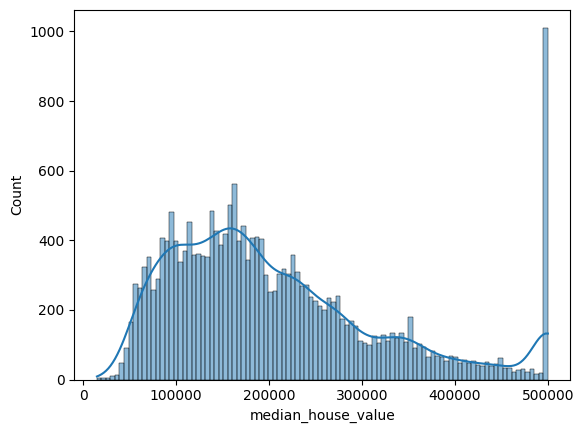

In [15]:
#  Is median_house_value has long tail?
import matplotlib as plt
import seaborn as sns
# create a histogram of median_house_value with line cuvering the tail:

sns.histplot(dfHouse.median_house_value,bins=100,kde=True)
#  create a histogram of median_house_value without cuvering the tail:


# 


# dfHouse.median_house_value.hist(bins=100)

In [12]:
import numpy as np
price_log=np.log1p(dfHouse.median_house_value)

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

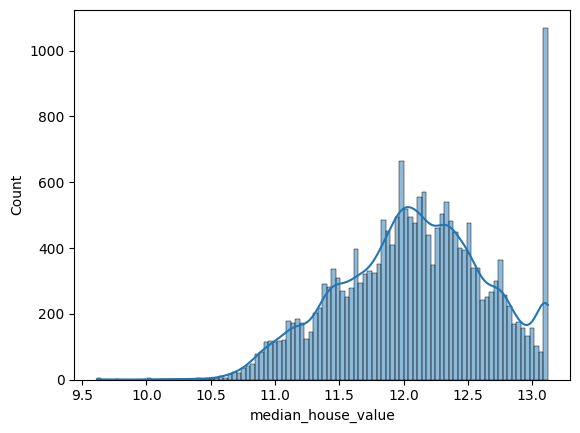

In [13]:
sns.histplot(price_log,bins=100,kde=True)

For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

Explore data

In [18]:
dfHouse.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:

# First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND':
dfHouseclean = dfHouse[dfHouse['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
dfHouseclean.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [20]:
# remove the ocean_proximity column:
dfHouseclean.drop('ocean_proximity',axis=1,inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_21744\378553248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfHouseclean.drop('ocean_proximity',axis=1,inplace=True)


In [21]:
dfHouseclean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


<b>Question 1<br></b>
There's one feature with missing values. What is it?

- total_rooms
- total_bedrooms
- population
- households

In [22]:
dfHouseclean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

so the answer is total_bedrooms

<b>Question 2<br></b>
What's the median (50% percentile) for variable 'population'?
<br>
- 995
- 1095
- 1195
- 1295


In [23]:
medianpopulation=dfHouseclean['population'].median()
medianpopulation


1195.0

<b>Prepare and split the dataset</b><br>
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

Test/Train/Validation split

In [25]:
n=len(dfHouseclean)
# shuffle the data use random_state=42



# split your data in train/val/test sets, with 60%/20%/20% distribution:
n_test=int(n*.2)
n_val=int(n*.2)
n_train=n-(n_test+n_val)
print(n,n_test+n_train+n_val)
n_test,n_val,n_train

# dfHouseclean=dfHouseclean.sample(frac=1,random_state=42)
# train=dfHouseclean[:int(len(dfHouseclean)*0.6)]
# val=dfHouseclean[int(len(dfHouseclean)*0.6):int(len(dfHouseclean)*0.8)]
# test=dfHouseclean[int(len(dfHouseclean)*0.8):]



15687 15687


(3137, 3137, 9413)

In [26]:
n_train

9413

In [27]:
import numpy as np
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
dfHouseclean=dfHouseclean.iloc[idx]

In [28]:
df_train=dfHouseclean.iloc[:n_train]
df_val=dfHouseclean.iloc[n_train:n_train+n_val]
df_test=dfHouseclean.iloc[n_train+n_val:]

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [29]:
y_train=np.log1p(df_train['median_house_value'])
y_val=np.log1p(df_val['median_house_value'])
y_test=np.log1p(df_test['median_house_value'])

In [30]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [31]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
9408,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080
9409,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
9410,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546
9411,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526


<b>Question 3 </b><br>

- We need to deal with missing values for the column from Q1.<br>
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [32]:
#  fill the missing values in total_bedrooms with 0:
df_train1=df_train.copy()
df_train2=df_train.copy()
df_train1['total_bedrooms']=df_train1['total_bedrooms'].fillna(0)
df_train2['total_bedrooms']=df_train2['total_bedrooms'].fillna(df_train2['total_bedrooms'].median())

In [33]:
df_train1.isnull().sum()
df_train2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [34]:
df_train1.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object

In [35]:
base=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
target=['median_house_value']


In [36]:
def prepare_X_withmean(df):
    df_num=df[base]
    df_num=df_num.fillna(df_num.median())
    X=df_num.values
    return X
def prepare_X_withZero(df):
    df_num=df[base]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [37]:
def rmse(y,y_pred):
    error=y -y_pred
    se= error** 2
    mse= se.mean()
    return np.sqrt(mse)

In [38]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [40]:
X_train=prepare_X_withZero(df_train)
w0,w = train_linear_regression(X_train,y_train)

In [41]:
w0,w

(-9.763249478301754,
 array([-2.55938802e-01, -2.68233309e-01,  1.77710730e-03, -3.38393956e-05,
         2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01]))

In [43]:
X_val=prepare_X_withZero(df_val)
y_pred=w0+X_val.dot(w)

In [44]:

np.round(rmse(y_val,y_pred),2)

0.34

<b> Now Fill missing with mean

In [45]:
X_train=prepare_X_withmean(df_train)
w0,w = train_linear_regression(X_train,y_train)


In [46]:
X_val=prepare_X_withmean(df_val)
y_pred=w0+X_val.dot(w)

In [47]:
np.round(rmse(y_val,y_pred),2)

0.34

<b> Both are equally good

<b>Question 4</b><br>
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
If there are multiple options, select the smallest r.

<b>options</b>
- 0
- 0.000001
- 0.001
- 0.0001

In [48]:
def train_linear_regression_reg(X,y,r):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])

    XTX=X.T.dot(X)
    
    XTX=XTX+r*np.eye(XTX.shape[0])

    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [52]:
for r in  [0, 0.000001, 0.001, 0.00001]:
    X_train=prepare_X_withZero(df_train)
    w0,w=train_linear_regression_reg(X_train,y_train,r=r)
    X_val=prepare_X_withZero(df_val)
    y_pred=w0+X_val.dot(w)
    score=np.round(rmse(y_val,y_pred),2)
    print(r,w0,score)
    

0 -9.763249478301754 0.34
1e-06 -9.763228831228593 0.34
0.001 -9.742646249834253 0.34
1e-05 -9.76304301441006 0.34


 Given that results are same, a model with no regularization tends to be more interpretable and may be easier to understand. It doesn't introduce unnecessary complexity when the performance is already satisfactory.

<b>Question 5</b> </br>
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [54]:
import numpy as np
seeds=[0,1,2,3,4,5,6,7,8,9]
scores=[]
for seed in seeds: 
    idx=np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    dfHouseclean=dfHouseclean.iloc[idx]
    # print(idx)
    #  do the split
    df_train=dfHouseclean.iloc[idx[:n_train]]
    df_val=dfHouseclean.iloc[idx[n_train:n_train+n_val]]
    df_test=dfHouseclean.iloc[idx[n_train+n_val:]]
    # fill the missing values with 0:

    df_train=df_train.reset_index(drop=True)
    df_val=df_val.reset_index(drop=True)
    df_test=df_test.reset_index(drop=True)

    y_train = df_train.median_house_value.values
    y_val = df_val.median_house_value.values
    y_test = df_test.median_house_value.values

    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    y_test = np.log1p(y_test)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train=prepare_X_withZero(df_train)
    w0,w=train_linear_regression(X_train,y_train)
    X_val=prepare_X_withZero(df_val)
    y_pred=w0+X_val.dot(w)
    score=np.round(rmse(y_val,y_pred),2)
    scores.append(score)
    print(seed,w0,score)


0 -9.886463001570139 0.35
1 -10.440471991436398 0.34
2 -9.747490621039683 0.34
3 -9.671096268971873 0.35
4 -10.390199895950762 0.34
5 -9.69990073837519 0.34
6 -9.143289480655913 0.34
7 -9.634162664548185 0.34
8 -10.10051635368394 0.35
9 -10.192353271041105 0.34


In [55]:
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
np.round(np.std(scores),3)

# Round the result to 3 decimal digits (round(std, 3))

0.005

<b>Question 6 </b>
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?



In [56]:
idx=np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
dfHouseclean=dfHouseclean.iloc[idx]
df_train=dfHouseclean.iloc[idx[:n_train]]
df_val=dfHouseclean.iloc[idx[n_train:n_train+n_val]]
df_test=dfHouseclean.iloc[idx[n_train+n_val:]]
# combine train and val
df_full_train=pd.concat([df_train,df_val])
# reset index:
df_full_train=df_full_train.reset_index(drop=True)
df_full_train.columns
y_full_train=df_full_train.median_house_value
y_test=df_test.median_house_value

y_full_train=np.log1p(df_full_train.median_house_value)
y_test=np.log1p(df_test.median_house_value)

del df_full_train['median_house_value']
del df_test['median_house_value']


# X_train=prepare_X_withzero(df_full_train)
# w0,w=train_linear_regression_reg(X_train,y_test)
# X_val=prepare_X_withzero(df_val)
# y_pred=w0+X_val.dot(w)
# score=rmse(y_val,y_pred)

In [63]:
#@ INSPECTING RMSE:
X_null_train_val = prepare_X_withZero(df_full_train)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_full_train, r=0.001)

X_null_test = prepare_X_withZero(df_test)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)
     


0.34